# Introdução ao Pandas

### Utilizando o arquivo Ratings

In [18]:
import pandas as pd

notas = pd.read_csv("ml-latest-small/ratings.csv")
notas.head()

# O head mostra as primeiras N ocorrências do dataframe, 
# por padrão n = 5.

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
notas.shape

# O shape mostra a quantidade de linhas e colunas do dataframe.

(100836, 4)

In [20]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas.head()

# O columns nos permite alterar o nome das colunas.

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
notas['nota'].unique()

# Dessa forma, conseguimos printar apenas a coluna nota, como
# se fosse um dicionário.
# O unique apresenta apenas as ocorrências únicas de nota.

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [22]:
notas['nota'].value_counts()

# O counts conta a quantidade de ocorrências de cada nota.

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [23]:
notas['nota'].mean()

# O mean representa a média das notas.

3.501556983616962

In [24]:
notas.nota.head()

# A definição .nota é o mesmo de ['nota']

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

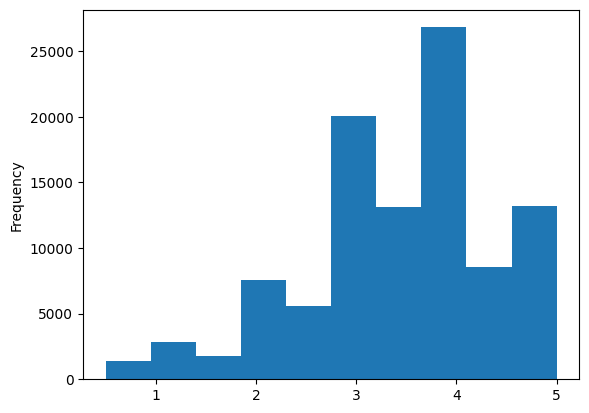

In [25]:
notas.nota.plot(kind='hist')

# O plot do tipo histograma ('hist') irá mostrar 
# a frequência de cada nota

In [26]:
print(f'Média: {notas.nota.mean()}')
print(f'Mediana: {notas.nota.median()}')

# A média é a soma dos valores dividida pela quantidade
# A mediana é o número que fica no meio da amostra
# Exemplo: {2, 2, 3, 7, 8, 9, 9} -> mediana = 7

Média: 3.501556983616962
Mediana: 3.5


In [27]:
notas.nota.describe()

# O describe apresenta alguns dados que permitem analisar o dataframe

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

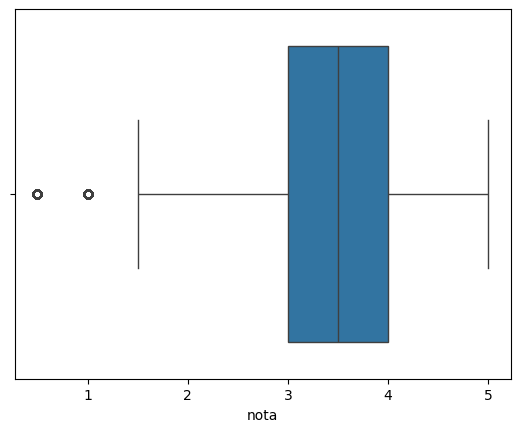

In [28]:
import seaborn as sns

sns.boxplot(x = notas.nota)

### Utilizando o arquivo Filmes


In [29]:
filmes = pd.read_csv("ml-latest-small/movies.csv")
filmes.columns = ["filmeID", "Titulo", "Generos"]
filmes.head()

,filmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Querys

In [30]:
notas.query("filmeID == 1").nota

# A função query nos permite fazer uma pesquisa no dataframe
# semelhante à um Banco de Dados mesmo
# Nessa pesquisa apareceram apenas as notas do filme com ID = 1
# nesse caso, é o filme Toy Story

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [32]:
notas.query("filmeID == 1").nota.mean()

# Essa é a nota média das avaliações do filme com ID == 1,
# que é Toy Story

3.9209302325581397

In [33]:
notas.query("filmeID == 2").nota.mean()

# Essa é a nota média das avaliações do filme com ID == 2,
# que é Jumanji

3.4318181818181817

In [38]:
media_por_filme = notas.groupby("filmeID").mean()["nota"]

# Aqui é bem semelhante à uma pesquisa SQL
# No caso, estamos agrupando as notas pela coluna filmeID
# e printando a média de avaliações de cada filme

<Axes: ylabel='Frequency'>

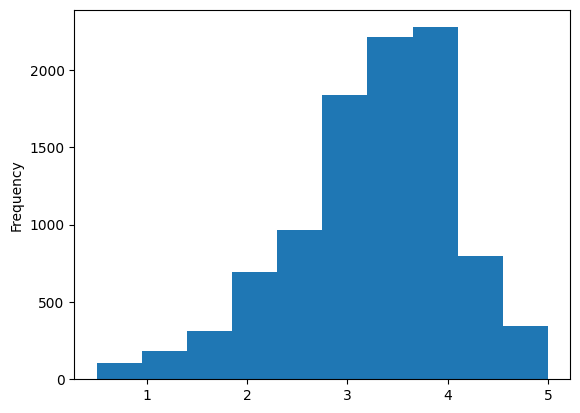

In [39]:
media_por_filme.plot(kind="hist")

# Aqui temos o histograma de médias por filmes, mostrando a
# frequência de ocorrências de cada média

<Axes: xlabel='nota'>

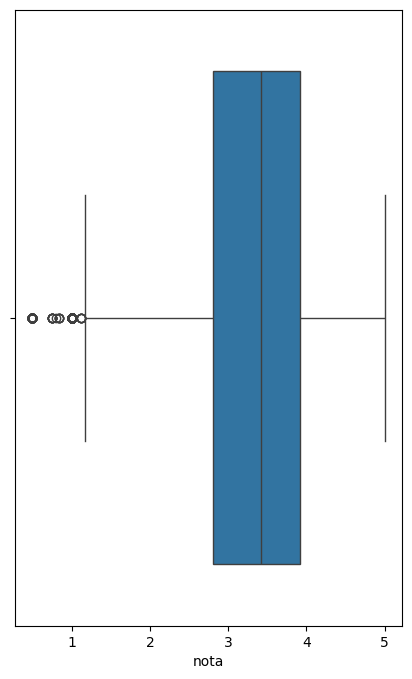

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
# Usando uma proporçãode 5 (comprimento) por 8 (largura).
sns.boxplot(x = media_por_filme)

# Aqui o gráfico da mesma forma, mas usando o Seaborn

In [44]:
media_por_filme.describe()

# Aqui usando o describe para ver mais detalhes sobre essas médias

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

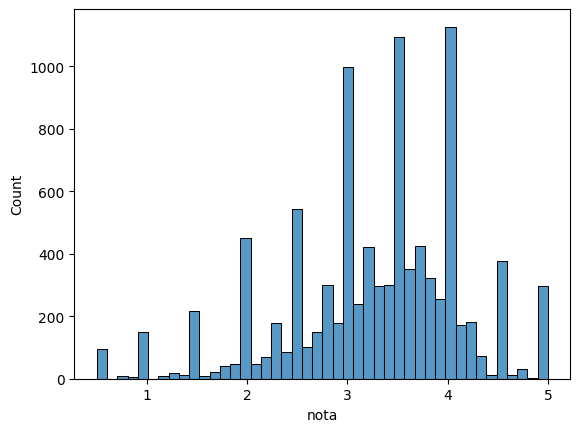

In [49]:
sns.histplot(media_por_filme)

# O seaborn também possui a sua forma de histograma

Text(0.5, 1.0, 'Histograma da Média dos Filmes')

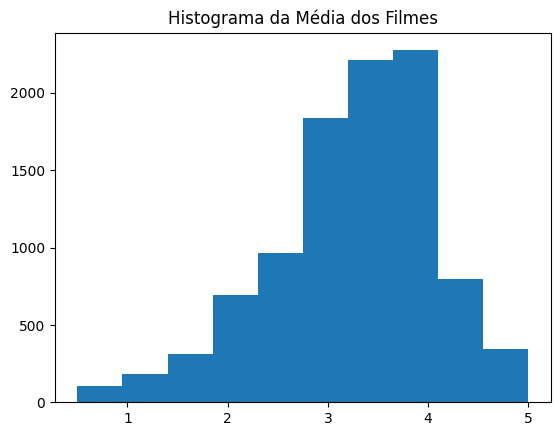

In [51]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma da Média dos Filmes")
# Título

# Aqui usando o pyplot através do matplotlib
# Uma forma mais "crua" do que o Seaborn, por exemplo